# Network-anomaly detection on a smart grid-network

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
ls

drive/  sample_data/


### Project Objectives
This project is to build a **Machine Learning Model** to predict Network-anomaly detection on a smart grid-network.
The traget variable..........

### Table of Content
1. [Data importation](#1.Data-gathering-and-cleaning)

2. [Exploratory data analysis, data cleaning, and Feature engineering](#2.Exploratory-data-analysis,data-cleaning,and-Feature-engineering)

3. [Data preprocessing for modelling](#3.Data-preprocessing-for-modelling)

4. [Building different Classification models](#4.Building-of-Models)

5. [Model Evaluation](#5.Model-Evaluation-and-Comparison)

6. [Model selection](#6.Implementing-the-best-Best-model-with-test-data)





## Importing the needed packages

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_columns',None)

In [5]:
# Importing the needed classes for building models,validation, and metrics.

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC 

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
#
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Multi-Class Data1

## 1.Data-gathering-and-cleaning

#### About the data

In [6]:
data = pd.read_csv('/content/drive/MyDrive/Network-Anomalies-Detection-on-the-Smart-Grid-Network/3 Classes/data5.csv')

In [7]:
data.head()

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,R1-PA6:IH,R1-PM6:I,R1-PA7:VH,R1-PM7:V,R1-PA8:VH,R1-PM8:V,R1-PA9:VH,R1-PM9:V,R1-PA10:IH,R1-PM10:I,R1-PA11:IH,R1-PM11:I,R1-PA12:IH,R1-PM12:I,R1:F,R1:DF,R1-PA:Z,R1-PA:ZH,R1:S,R2-PA1:VH,R2-PM1:V,R2-PA2:VH,R2-PM2:V,R2-PA3:VH,R2-PM3:V,R2-PA4:IH,R2-PM4:I,R2-PA5:IH,R2-PM5:I,R2-PA6:IH,R2-PM6:I,R2-PA7:VH,R2-PM7:V,R2-PA8:VH,R2-PM8:V,R2-PA9:VH,R2-PM9:V,R2-PA10:IH,R2-PM10:I,R2-PA11:IH,R2-PM11:I,R2-PA12:IH,R2-PM12:I,R2:F,R2:DF,R2-PA:Z,R2-PA:ZH,R2:S,R3-PA1:VH,R3-PM1:V,R3-PA2:VH,R3-PM2:V,R3-PA3:VH,R3-PM3:V,R3-PA4:IH,R3-PM4:I,R3-PA5:IH,R3-PM5:I,R3-PA6:IH,R3-PM6:I,R3-PA7:VH,R3-PM7:V,R3-PA8:VH,R3-PM8:V,R3-PA9:VH,R3-PM9:V,R3-PA10:IH,R3-PM10:I,R3-PA11:IH,R3-PM11:I,R3-PA12:IH,R3-PM12:I,R3:F,R3:DF,R3-PA:Z,R3-PA:ZH,R3:S,R4-PA1:VH,R4-PM1:V,R4-PA2:VH,R4-PM2:V,R4-PA3:VH,R4-PM3:V,R4-PA4:IH,R4-PM4:I,R4-PA5:IH,R4-PM5:I,R4-PA6:IH,R4-PM6:I,R4-PA7:VH,R4-PM7:V,R4-PA8:VH,R4-PM8:V,R4-PA9:VH,R4-PM9:V,R4-PA10:IH,R4-PM10:I,R4-PA11:IH,R4-PM11:I,R4-PA12:IH,R4-PM12:I,R4:F,R4:DF,R4-PA:Z,R4-PA:ZH,R4:S,control_panel_log1,control_panel_log2,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,66.445915,133715.7489,-53.537176,133715.7489,-173.531727,133790.9687,63.896253,589.79731,-60.464236,622.57400,-175.313626,585.76889,66.463104,133740.8222,0.0,0.0,0.0,0.0,62.641476,598.95281,119.221058,20.32521,-106.060217,20.69143,59.953,-0.01,7.131712,0.028560,0,57.263490,130994.3047,-62.690734,130842.5938,177.272642,131077.4063,-121.808173,597.684875,113.952943,627.902954,-1.167297,592.695252,57.285463,130973.7813,0.0,0.0,0.0,0.0,-123.060611,605.649963,-66.777653,19.872665,67.250063,19.454956,59.946999,-0.08,6.836982,3.109245,0,57.261402,130531.4436,-62.710231,130481.2971,177.313249,130556.5169,-122.022822,596.02305,113.967035,624.22199,-1.352180,590.16353,57.290050,130531.4436,0.0,0.0,0.0,0.0,-123.185926,602.98123,-67.528806,19.04344,68.376783,18.31100,59.947,-0.08,6.798034,3.115970,0,66.503211,133790.9687,-53.485610,133164.1370,-173.480161,133866.1885,63.942090,588.69865,-60.309538,618.36247,-175.600105,583.93779,66.520400,133615.4558,0.0,0.0,0.0,0.0,62.624287,596.57238,120.727937,19.59277,-107.968167,18.67722,59.955,0.00,7.067612,0.027378,0,0,0,0,0,0,0,0,0,0,0,0,0,NoEvents
1,59.908467,127622.9443,-60.068895,127597.8710,179.943125,127673.0908,55.089892,629.34907,-67.964254,654.06892,175.777722,625.86998,59.919926,127622.9443,0.0,0.0,0.0,0.0,54.270562,636.12414,109.824550,15.19813,-112.706528,15.93057,59.986,0.01,6.195674,0.075754,0,49.726868,124370.9453,-70.221865,124229.6172,169.752508,124447.0938,-129.883123,636.280029,107.124940,659.786255,-9.385071,632.520691,49.748841,124351.8984,0.0,0.0,0.0,0.0,-130.740052,642.631531,-73.874821,14.974594,61.009831,14.911652,59.984001,0.05,5.937575,3.125597,0,49.727007,123937.1736,-70.238896,123912.1003,169.778854,123937.1736,-130.090067,633.92682,107.034246,655.71691,-9.614232,628.98285,49.755655,123937.1736,0.0,0.0,0.0,0.0,-130.915127,639.23701,-74.776722,14.64880,61.850794,13.91636,59.986,0.05,5.914982,3.131022,0,59.954304,127698.1641,-60.034518,127071.3324,179.977503,127748.3107,55.164377,627.15175,-67.843933,649.30806,175.686049,621.65845,59.965763,127497.5780,0.0,0.0,0.0,0.0,54.310669,632.46194,109.916223,15.19813,-112.872686,14.46569,59.986,0.05,6.177444,0.076036,0,0,0,0,0,0,0,0,0,0,0,0,0,NoEvents
2,58.630771,127296.9918,-61.346591,127271.9185,178.659700,127372.2116,52.987137,638.68768,-69.494051,658.09734,173.600482,635.94103,58.653689,127322.0651,0.0,0.0,0.0,0.0,52.345424,644.18098,105.676336,12.45148,-115.571317,13.18392,60.000,0.01,6.003465,0.091260,0,48.370058,124017.7188,-71.584166,123874.0313,168.384708,124091.7109,-131.992491,645.858765,105.570375,664.192200,-11.532898,642.459839,48.392030,123995.4844,0.0,0.0,0.0,0.0,-132.668160,650.676758,-78.000187,12.313843,58.570867,12.222290,60.000000,0.01,5.756391,3.140448,0,48.369097,123586.1478,-71.596806,12356

## 2.Exploratory-data-analysis,data-cleaning,and-Feature-engineering

### Inspecting the data 

In [8]:
data.shape

(5161, 129)

### Checking the data types of the different columns

In [9]:
data.dtypes

R1-PA1:VH     float64
R1-PM1:V      float64
R1-PA2:VH     float64
R1-PM2:V      float64
R1-PA3:VH     float64
               ...   
snort_log1      int64
snort_log2      int64
snort_log3      int64
snort_log4      int64
marker         object
Length: 129, dtype: object

### Checking for missing values

In [10]:
data.isnull().sum()

R1-PA1:VH     0
R1-PM1:V      0
R1-PA2:VH     0
R1-PM2:V      0
R1-PA3:VH     0
             ..
snort_log1    0
snort_log2    0
snort_log3    0
snort_log4    0
marker        0
Length: 129, dtype: int64

In [11]:
data.isnull().sum().sum()

0

From the explorations above, there are no missing values


### Separating Numerical variables and Categorical variables

In [12]:
categorical_var = data.select_dtypes(include = 'object') 

numerical_var = data.select_dtypes(include = np.number) 

In [13]:
# Categorical variables
categorical_var.columns

Index(['marker'], dtype='object')

###  Creating a function to explore the categorical variables

To easily explore the explore, the categorical variables a function created to give a quick numerical and graphical summary.

In [14]:
# Creating a function to explore the categorical variables
def explore_cat(df,x):
    '''
    This function return a sumaary of a categorical variable
    
    '''
    unique_categories = df[x].nunique()
    if unique_categories <=6:
        print('Summary')
        print('==========')
        print(df[x].describe(),'\n')
        sns.countplot(df[x])
        plt.show()
        print('==============================================')
        print('Value counts \n')
        print(df[x].value_counts(normalize=True)*100,'\n')
        print('==============================================')
        print('Missing values: {}'.format(df[x].isnull().sum()))
    else:
        print('Summary')
        print('==========')
        print(df[x].describe(),'\n')
        sns.countplot(y=df[x])
        plt.show()
        print('==============================================')
        print('Value counts \n')
        print(df[x].value_counts(),'\n')
        print('==============================================')
        print('Missing values: {}'.format(df[x].isnull().sum()))
    
    
    
    

#### Exploring  Credit-Application-Result

Summary
count       5161
unique         3
top       Attack
freq        3680
Name: marker, dtype: object 



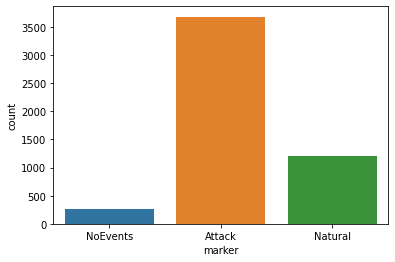

Value counts 

Attack      71.304011
Natural     23.464445
NoEvents     5.231544
Name: marker, dtype: float64 

Missing values: 0


In [15]:
explore_cat(data,'marker')

# Exploring the numerical Variables

In [16]:
# Numerical variables

numerical_var.columns

Index(['R1-PA1:VH', 'R1-PM1:V', 'R1-PA2:VH', 'R1-PM2:V', 'R1-PA3:VH',
       'R1-PM3:V', 'R1-PA4:IH', 'R1-PM4:I', 'R1-PA5:IH', 'R1-PM5:I',
       ...
       'control_panel_log3', 'control_panel_log4', 'relay1_log', 'relay2_log',
       'relay3_log', 'relay4_log', 'snort_log1', 'snort_log2', 'snort_log3',
       'snort_log4'],
      dtype='object', length=128)

In [17]:
numerical_var.describe()

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,R1-PA6:IH,R1-PM6:I,R1-PA7:VH,R1-PM7:V,R1-PA8:VH,R1-PM8:V,R1-PA9:VH,R1-PM9:V,R1-PA10:IH,R1-PM10:I,R1-PA11:IH,R1-PM11:I,R1-PA12:IH,R1-PM12:I,R1:F,R1:DF,R1-PA:Z,R1-PA:ZH,R1:S,R2-PA1:VH,R2-PM1:V,R2-PA2:VH,R2-PM2:V,R2-PA3:VH,R2-PM3:V,R2-PA4:IH,R2-PM4:I,R2-PA5:IH,R2-PM5:I,R2-PA6:IH,R2-PM6:I,R2-PA7:VH,R2-PM7:V,R2-PA8:VH,R2-PM8:V,R2-PA9:VH,R2-PM9:V,R2-PA10:IH,R2-PM10:I,R2-PA11:IH,R2-PM11:I,R2-PA12:IH,R2-PM12:I,R2:F,R2:DF,R2-PA:Z,R2-PA:ZH,R2:S,R3-PA1:VH,R3-PM1:V,R3-PA2:VH,R3-PM2:V,R3-PA3:VH,R3-PM3:V,R3-PA4:IH,R3-PM4:I,R3-PA5:IH,R3-PM5:I,R3-PA6:IH,R3-PM6:I,R3-PA7:VH,R3-PM7:V,R3-PA8:VH,R3-PM8:V,R3-PA9:VH,R3-PM9:V,R3-PA10:IH,R3-PM10:I,R3-PA11:IH,R3-PM11:I,R3-PA12:IH,R3-PM12:I,R3:F,R3:DF,R3-PA:Z,R3-PA:ZH,R3:S,R4-PA1:VH,R4-PM1:V,R4-PA2:VH,R4-PM2:V,R4-PA3:VH,R4-PM3:V,R4-PA4:IH,R4-PM4:I,R4-PA5:IH,R4-PM5:I,R4-PA6:IH,R4-PM6:I,R4-PA7:VH,R4-PM7:V,R4-PA8:VH,R4-PM8:V,R4-PA9:VH,R4-PM9:V,R4-PA10:IH,R4-PM10:I,R4-PA11:IH,R4-PM11:I,R4-PA12:IH,R4-PM12:I,R4:F,R4:DF,R4-PA:Z,R4-PA:ZH,R4:S,control_panel_log1,control_panel_log2,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4
count,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.0,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.000000,5161.0,5161.0,5161.0,5161.0,5161.000000,5161.000000,5161.000000,5161.000000,5161.0,5161.0,5161.0,5161.0
mean,-20.430024,130862.089175,0.372894,131153.310275,9.031791,131534.316126,-17.121299,389.158883,-0.166089,382.174625,13.971559,376.635805,-20.413449,131174.798179,0.608522,315.823123,0.699708,93.967678,-17.332383,381.351606,-2.641594,10.431629,7.839698,10.022585,60.000087,0.002126,inf,0.016530,60.776594,-20.436372,126969.086018,2.697368,128022.169666,15.991143,128394.063983,24.009595,389.902775,-4.089127,386.974687,-18.609278,381.761542,-20.353673,127786.850316,0.649424,427.453501,0.513571,441.167553,24.427034,384.104655,2.209514,10.713490,-5.764507,8.858221,59.999238,-0.002197,inf,-2.175784,0.0,-20.441995,126775.836032,2.675426,127814.324139,15.984892,128200.635166,22.665068,385.948337,-4.972731,381.571579,-18.148121,377.568421,-20.364929,127588.620985,0.649829,426.532225,0.511556,440.538471,23.320610,379.633721,3.308372,10.598808,-4.443028,8.779913,59.999230,-0.002226,inf,-2.172095,31.353614,-19.702410,131037.424503,1.410420,131316.949189,9.396067,131716.434047,-17.434859,387.293468,0.781031,378.568070,13.578679,374.945959,-19.680510,131347.820612,0.931469,320.790247,0.685413,89.868890,-17.598785,378.992207,-2.406224,10.567314,7.448343,9.669693,59.997902,-0.000114,inf,0.005314,24.254602,0.0,0.0,0.0,0.0,0.037202,0.028483,0.029258,0.034489,0.0,0.0,

A general inspection of the descriptive statistics above indicates that variables have different scales which may cause models to put more weight on those with high values at the expense of those with low values.

To resolve this, the variables may or may not be scaled depending on the kind of algorithm that is used.

### Calculating correlation among the numerical variables to investigate for multi-colinearity

In [18]:
cor = numerical_var.corr()

In [19]:
cor

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,R1-PA6:IH,R1-PM6:I,R1-PA7:VH,R1-PM7:V,R1-PA8:VH,R1-PM8:V,R1-PA9:VH,R1-PM9:V,R1-PA10:IH,R1-PM10:I,R1-PA11:IH,R1-PM11:I,R1-PA12:IH,R1-PM12:I,R1:F,R1:DF,R1-PA:Z,R1-PA:ZH,R1:S,R2-PA1:VH,R2-PM1:V,R2-PA2:VH,R2-PM2:V,R2-PA3:VH,R2-PM3:V,R2-PA4:IH,R2-PM4:I,R2-PA5:IH,R2-PM5:I,R2-PA6:IH,R2-PM6:I,R2-PA7:VH,R2-PM7:V,R2-PA8:VH,R2-PM8:V,R2-PA9:VH,R2-PM9:V,R2-PA10:IH,R2-PM10:I,R2-PA11:IH,R2-PM11:I,R2-PA12:IH,R2-PM12:I,R2:F,R2:DF,R2-PA:Z,R2-PA:ZH,R2:S,R3-PA1:VH,R3-PM1:V,R3-PA2:VH,R3-PM2:V,R3-PA3:VH,R3-PM3:V,R3-PA4:IH,R3-PM4:I,R3-PA5:IH,R3-PM5:I,R3-PA6:IH,R3-PM6:I,R3-PA7:VH,R3-PM7:V,R3-PA8:VH,R3-PM8:V,R3-PA9:VH,R3-PM9:V,R3-PA10:IH,R3-PM10:I,R3-PA11:IH,R3-PM11:I,R3-PA12:IH,R3-PM12:I,R3:F,R3:DF,R3-PA:Z,R3-PA:ZH,R3:S,R4-PA1:VH,R4-PM1:V,R4-PA2:VH,R4-PM2:V,R4-PA3:VH,R4-PM3:V,R4-PA4:IH,R4-PM4:I,R4-PA5:IH,R4-PM5:I,R4-PA6:IH,R4-PM6:I,R4-PA7:VH,R4-PM7:V,R4-PA8:VH,R4-PM8:V,R4-PA9:VH,R4-PM9:V,R4-PA10:IH,R4-PM10:I,R4-PA11:IH,R4-PM11:I,R4-PA12:IH,R4-PM12:I,R4:F,R4:DF,R4-PA:Z,R4-PA:ZH,R4:S,control_panel_log1,control_panel_log2,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4
R1-PA1:VH,1.000000,0.043074,-0.352302,0.011001,-0.323726,0.011928,0.906823,-0.003467,-0.346528,0.032479,-0.267210,0.032029,0.999996,0.030632,-0.055620,-0.053083,-0.051991,-0.046306,0.911217,0.023310,0.103788,-0.064813,-0.228432,-0.058992,-0.000687,-0.013416,-0.008611,-0.015264,-0.031181,0.870887,0.042711,-0.376733,0.014126,-0.186151,0.004812,-0.447218,0.012774,0.391959,0.032963,0.069748,0.032571,0.866239,0.024687,-0.052056,-0.055267,-0.043688,-0.054085,-0.452578,0.032245,-0.191223,-0.061670,0.410700,-0.061900,0.007727,-0.046608,-0.022463,-0.042619,NaN,0.870888,0.041929,-0.376748,0.014717,-0.186153,0.003622,-0.446029,-0.000251,0.384300,0.020677,0.058354,0.020131,0.866239,0.024157,-0.051958,-0.055253,-0.043849,-0.054062,-0.448167,0.019742,-0.196837,-0.051332,0.376963,-0.047920,0.007726,-0.048226,-0.033896,-0.042749,-0.000267,0.947629,0.048606,-0.349842,0.026043,-0.316993,0.029269,0.882716,-0.012413,-0.338386,0.019348,-0.256350,0.017806,0.947648,0.041005,-0.052944,-0.049493,-0.048947,-0.043614,0.889153,0.010202,0.098447,-0.052679,-0.217655,-0.047169,0.003794,-0.037163,-0.030597,-0.005701,-0.004478,NaN,NaN,NaN,NaN,-0.007390,-0.012749,0.004819,-0.003660,NaN,NaN,NaN,NaN
R1-PM1:V,0.043074,1.000000,-0.025360,0.730402,-0.007329,0.748785,0.002849,-0.745041,-0.022576,-0.323901,-0.007993,-0.286867,0.042064,0.944540,-0.399871,-0.915589,-0.479363,-0.894315,0.017404,-0.451184,0.044414,-0.846745,0.052151,-0.889920,-0.104474,-0.059266,0.127931,-0.569719,-0.066175,0.037398,0.564172,-0.026885,0.159517,0.003102,0.035801,0.035385,-0.528865,0.031693,-0.322755,0.003264,-0.280626,0.032221,0.309396,-0.335954,-0.803913,-0.252580,-0.702479,-0.009340,-0.305766,0.046436,-0.810883,0.036544,-0.689716,0.012296,-0.078881,0.053892,-0.079534,NaN,0.037398,0.563931,-0.026886,0.159393,0.003113,0.035295,0.020936,-0.298850,0.014765,0.066941,0.002669,-0.025990,0.032225,0.309089,-0.336214,-0.804063,-0.251887,-0.702616,0.012184,-0.031172,0.014373,-0.731682,-0.004632,-0.576746,0.011924,-0.095535,0.022574,-0.081434,-0.161438,0.053740,0.544746,-0.028546,0.273484,-0.022683,0.295560,0.021662,-0.316611,-0.032732,0.080027,-0.011286,-0.026783,0.054036,0.445321,-0.332572,-0.599142,-0.294799,-0.441545,0.024148,-0.072431,-0.004132,-0.672615,-0.021129,-0.501976,-0.037687,-0.129172,0.022557,-0.387757,-0.069029,NaN,NaN,NaN,NaN,0.062640,0.022988,-0.185586,-0.177630,NaN,NaN,NaN,NaN
R1-PA2:VH,-0.352302,-0.025360,1.000000,-0.009938,-0.340077,-0.008513,-0.321794,0.051763,0.938431,0.052006,-0.357682,0.043987,-0.352245,-0.019263,0.010517,0.027152,-0.005169,0.030628,-0.324730,0.051369,-0.224895,0.022050,0.097724,0.030738,-0.011666,-0.011485,-0.036558,0.047650,-0.009668,-0.299368,-0.001856,0.870916,0.012430,-0.422886,0.014836,-0.067117,0.045369,-0.465617,0.054479,0.208003,0.045357,-

In [20]:

mask = np.triu(np.ones_like(cor,dtype=bool))
half_cor_matrix = cor.mask(mask)
half_cor_matrix

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,R1-PA6:IH,R1-PM6:I,R1-PA7:VH,R1-PM7:V,R1-PA8:VH,R1-PM8:V,R1-PA9:VH,R1-PM9:V,R1-PA10:IH,R1-PM10:I,R1-PA11:IH,R1-PM11:I,R1-PA12:IH,R1-PM12:I,R1:F,R1:DF,R1-PA:Z,R1-PA:ZH,R1:S,R2-PA1:VH,R2-PM1:V,R2-PA2:VH,R2-PM2:V,R2-PA3:VH,R2-PM3:V,R2-PA4:IH,R2-PM4:I,R2-PA5:IH,R2-PM5:I,R2-PA6:IH,R2-PM6:I,R2-PA7:VH,R2-PM7:V,R2-PA8:VH,R2-PM8:V,R2-PA9:VH,R2-PM9:V,R2-PA10:IH,R2-PM10:I,R2-PA11:IH,R2-PM11:I,R2-PA12:IH,R2-PM12:I,R2:F,R2:DF,R2-PA:Z,R2-PA:ZH,R2:S,R3-PA1:VH,R3-PM1:V,R3-PA2:VH,R3-PM2:V,R3-PA3:VH,R3-PM3:V,R3-PA4:IH,R3-PM4:I,R3-PA5:IH,R3-PM5:I,R3-PA6:IH,R3-PM6:I,R3-PA7:VH,R3-PM7:V,R3-PA8:VH,R3-PM8:V,R3-PA9:VH,R3-PM9:V,R3-PA10:IH,R3-PM10:I,R3-PA11:IH,R3-PM11:I,R3-PA12:IH,R3-PM12:I,R3:F,R3:DF,R3-PA:Z,R3-PA:ZH,R3:S,R4-PA1:VH,R4-PM1:V,R4-PA2:VH,R4-PM2:V,R4-PA3:VH,R4-PM3:V,R4-PA4:IH,R4-PM4:I,R4-PA5:IH,R4-PM5:I,R4-PA6:IH,R4-PM6:I,R4-PA7:VH,R4-PM7:V,R4-PA8:VH,R4-PM8:V,R4-PA9:VH,R4-PM9:V,R4-PA10:IH,R4-PM10:I,R4-PA11:IH,R4-PM11:I,R4-PA12:IH,R4-PM12:I,R4:F,R4:DF,R4-PA:Z,R4-PA:ZH,R4:S,control_panel_log1,control_panel_log2,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4
R1-PA1:VH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R1-PM1:V,0.043074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R1-PA2:VH,-0.352302,-0.025360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R1-PM2:V,0.011001,0.730402,-0.009938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R1-PA3:VH,-0.323726,-0.007329,-0.340077,0.004984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

## Highly correlated variables

In [21]:
# Creating a list comprehension to pick the variable with high variance.

highly_correlated_variables = [i for i in half_cor_matrix.columns if any (half_cor_matrix[i]>0.9) ] 
print(highly_correlated_variables)
print(f'\n There are {len(highly_correlated_variables)} correlated variables')

['R1-PA1:VH', 'R1-PM1:V', 'R1-PA2:VH', 'R1-PM2:V', 'R1-PA3:VH', 'R1-PM3:V', 'R1-PA4:IH', 'R1-PM4:I', 'R1-PA5:IH', 'R1-PM5:I', 'R1-PA6:IH', 'R1-PM6:I', 'R1-PA7:VH', 'R1-PM8:V', 'R1-PM9:V', 'R1-PA10:IH', 'R1-PM10:I', 'R1-PM11:I', 'R2-PA1:VH', 'R2-PM1:V', 'R2-PA2:VH', 'R2-PM2:V', 'R2-PA3:VH', 'R2-PM3:V', 'R2-PA4:IH', 'R2-PM4:I', 'R2-PM5:I', 'R2-PA6:IH', 'R2-PM6:I', 'R2-PA7:VH', 'R2-PM7:V', 'R2-PA8:VH', 'R2-PM8:V', 'R2-PA9:VH', 'R2-PM9:V', 'R2-PM11:I', 'R2-PM12:I', 'R2:F', 'R2:DF', 'R3-PA1:VH', 'R3-PM1:V', 'R3-PM2:V', 'R3-PM3:V', 'R3-PA4:IH', 'R3-PM4:I', 'R3-PM5:I', 'R3-PM6:I', 'R3-PM8:V', 'R3-PM10:I', 'R3-PM11:I', 'R4-PA1:VH', 'R4-PM1:V', 'R4-PA2:VH', 'R4-PM2:V', 'R4-PM3:V', 'R4-PA4:IH', 'R4-PM4:I', 'R4-PM5:I', 'R4-PM6:I', 'R4-PA7:VH', 'R4-PM8:V', 'R4-PM9:V', 'R4-PM11:I']

 There are 63 correlated variables


# 3.Data-preprocessing-for-modelling

### Changing the target variable to a dummy variable

In [22]:
data['marker'] =data['marker'].replace({'Natural':0,'Attack':1, "NoEvents":2})

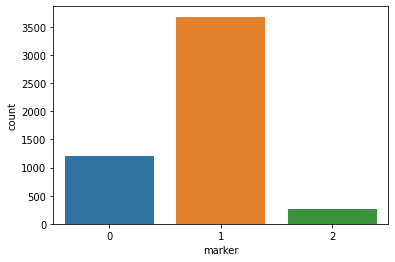

In [23]:

sns.countplot(data['marker'])
plt.show()

In [24]:
# Dropping variables with infinite values
data = data.drop(['R1-PA:Z','R2-PA:Z','R3-PA:Z','R4-PA:Z'],axis=1)


### Seperating the data into target variable and predictors

In [25]:
# predictors
X = data.drop('marker',axis = 1)

# Target variable
y = data['marker']# 

In [26]:
X.head()

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,R1-PA6:IH,R1-PM6:I,R1-PA7:VH,R1-PM7:V,R1-PA8:VH,R1-PM8:V,R1-PA9:VH,R1-PM9:V,R1-PA10:IH,R1-PM10:I,R1-PA11:IH,R1-PM11:I,R1-PA12:IH,R1-PM12:I,R1:F,R1:DF,R1-PA:ZH,R1:S,R2-PA1:VH,R2-PM1:V,R2-PA2:VH,R2-PM2:V,R2-PA3:VH,R2-PM3:V,R2-PA4:IH,R2-PM4:I,R2-PA5:IH,R2-PM5:I,R2-PA6:IH,R2-PM6:I,R2-PA7:VH,R2-PM7:V,R2-PA8:VH,R2-PM8:V,R2-PA9:VH,R2-PM9:V,R2-PA10:IH,R2-PM10:I,R2-PA11:IH,R2-PM11:I,R2-PA12:IH,R2-PM12:I,R2:F,R2:DF,R2-PA:ZH,R2:S,R3-PA1:VH,R3-PM1:V,R3-PA2:VH,R3-PM2:V,R3-PA3:VH,R3-PM3:V,R3-PA4:IH,R3-PM4:I,R3-PA5:IH,R3-PM5:I,R3-PA6:IH,R3-PM6:I,R3-PA7:VH,R3-PM7:V,R3-PA8:VH,R3-PM8:V,R3-PA9:VH,R3-PM9:V,R3-PA10:IH,R3-PM10:I,R3-PA11:IH,R3-PM11:I,R3-PA12:IH,R3-PM12:I,R3:F,R3:DF,R3-PA:ZH,R3:S,R4-PA1:VH,R4-PM1:V,R4-PA2:VH,R4-PM2:V,R4-PA3:VH,R4-PM3:V,R4-PA4:IH,R4-PM4:I,R4-PA5:IH,R4-PM5:I,R4-PA6:IH,R4-PM6:I,R4-PA7:VH,R4-PM7:V,R4-PA8:VH,R4-PM8:V,R4-PA9:VH,R4-PM9:V,R4-PA10:IH,R4-PM10:I,R4-PA11:IH,R4-PM11:I,R4-PA12:IH,R4-PM12:I,R4:F,R4:DF,R4-PA:ZH,R4:S,control_panel_log1,control_panel_log2,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4
0,66.445915,133715.7489,-53.537176,133715.7489,-173.531727,133790.9687,63.896253,589.79731,-60.464236,622.57400,-175.313626,585.76889,66.463104,133740.8222,0.0,0.0,0.0,0.0,62.641476,598.95281,119.221058,20.32521,-106.060217,20.69143,59.953,-0.01,0.028560,0,57.263490,130994.3047,-62.690734,130842.5938,177.272642,131077.4063,-121.808173,597.684875,113.952943,627.902954,-1.167297,592.695252,57.285463,130973.7813,0.0,0.0,0.0,0.0,-123.060611,605.649963,-66.777653,19.872665,67.250063,19.454956,59.946999,-0.08,3.109245,0,57.261402,130531.4436,-62.710231,130481.2971,177.313249,130556.5169,-122.022822,596.02305,113.967035,624.22199,-1.352180,590.16353,57.290050,130531.4436,0.0,0.0,0.0,0.0,-123.185926,602.98123,-67.528806,19.04344,68.376783,18.31100,59.947,-0.08,3.115970,0,66.503211,133790.9687,-53.485610,133164.1370,-173.480161,133866.1885,63.942090,588.69865,-60.309538,618.36247,-175.600105,583.93779,66.520400,133615.4558,0.0,0.0,0.0,0.0,62.624287,596.57238,120.727937,19.59277,-107.968167,18.67722,59.955,0.00,0.027378,0,0,0,0,0,0,0,0,0,0,0,0,0
1,59.908467,127622.9443,-60.068895,127597.8710,179.943125,127673.0908,55.089892,629.34907,-67.964254,654.06892,175.777722,625.86998,59.919926,127622.9443,0.0,0.0,0.0,0.0,54.270562,636.12414,109.824550,15.19813,-112.706528,15.93057,59.986,0.01,0.075754,0,49.726868,124370.9453,-70.221865,124229.6172,169.752508,124447.0938,-129.883123,636.280029,107.124940,659.786255,-9.385071,632.520691,49.748841,124351.8984,0.0,0.0,0.0,0.0,-130.740052,642.631531,-73.874821,14.974594,61.009831,14.911652,59.984001,0.05,3.125597,0,49.727007,123937.1736,-70.238896,123912.1003,169.778854,123937.1736,-130.090067,633.92682,107.034246,655.71691,-9.614232,628.98285,49.755655,123937.1736,0.0,0.0,0.0,0.0,-130.915127,639.23701,-74.776722,14.64880,61.850794,13.91636,59.986,0.05,3.131022,0,59.954304,127698.1641,-60.034518,127071.3324,179.977503,127748.3107,55.164377,627.15175,-67.843933,649.30806,175.686049,621.65845,59.965763,127497.5780,0.0,0.0,0.0,0.0,54.310669,632.46194,109.916223,15.19813,-112.872686,14.46569,59.986,0.05,0.076036,0,0,0,0,0,0,0,0,0,0,0,0,0
2,58.630771,127296.9918,-61.346591,127271.9185,178.659700,127372.2116,52.987137,638.68768,-69.494051,658.09734,173.600482,635.94103,58.653689,127322.0651,0.0,0.0,0.0,0.0,52.345424,644.18098,105.676336,12.45148,-115.571317,13.18392,60.000,0.01,0.091260,0,48.370058,124017.7188,-71.584166,123874.0313,168.384708,124091.7109,-131.992491,645.858765,105.570375,664.192200,-11.532898,642.459839,48.392030,123995.4844,0.0,0.0,0.0,0.0,-132.668160,650.676758,-78.000187,12.313843,58.570867,12.222290,60.000000,0.01,3.140448,0,48.369097,123586.1478,-71.596806,123561.0746,168.415214,123611.2211,-132.169904,642.53299,105.556015,659.19600,-11.665421,637.77213,48.397745,123586.1478,0.0,0.0,0.0,0.0,-132.771510,646

In [27]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: marker, dtype: int64

### Splitting the data into 70% train set and 30% test set

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,stratify = y,random_state = 0)

In [29]:
X_train.shape

(3612, 124)

# Feature selection using feature importance

In [30]:
rfc = RandomForestClassifier(random_state = 0)
rfc.fit(X_train,y_train)
print('train score: {:.2f}'.format(rfc.score(X_train,y_train)))
print('test score: {:.2f}'.format(rfc.score(X_test,y_test)))

train score: 1.00
test score: 0.96


In [31]:
Feature_importance=pd.DataFrame({'Features':X_train.columns,'Importance':rfc.feature_importances_})

In [32]:
Feature_importance = Feature_importance.sort_values(by = 'Importance',ascending = False)

In [33]:
first_45 = Feature_importance['Features'].values[0:45]

In [34]:
first_45

array(['R2-PA5:IH', 'R1-PA1:VH', 'R4-PA3:VH', 'R4-PA7:VH', 'R2-PA3:VH',
       'R4-PA1:VH', 'R1-PA3:VH', 'R3-PM5:I', 'R1-PA7:VH', 'R1-PA2:VH',
       'R4-PA2:VH', 'R3-PA2:VH', 'R3-PA7:VH', 'R1-PA5:IH', 'R2-PM3:V',
       'R2-PA2:VH', 'R4-PM5:I', 'R3-PA3:VH', 'R4-PM4:I', 'R3-PA5:IH',
       'R4-PM2:V', 'R4-PA5:IH', 'R1-PM2:V', 'R1-PM5:I', 'R2-PM1:V',
       'R2-PA7:VH', 'R2-PA1:VH', 'R3-PA10:IH', 'R3-PA1:VH', 'R4-PM6:I',
       'R2-PM5:I', 'R3-PA4:IH', 'R1-PA10:IH', 'R2-PA4:IH', 'R4-PM1:V',
       'R4-PM10:I', 'R4-PA6:IH', 'R2-PA10:IH', 'R2-PM7:V', 'R2-PM10:I',
       'R1-PA4:IH', 'R3-PM4:I', 'R4-PM7:V', 'R4-PA4:IH', 'R1-PM4:I'],
      dtype=object)

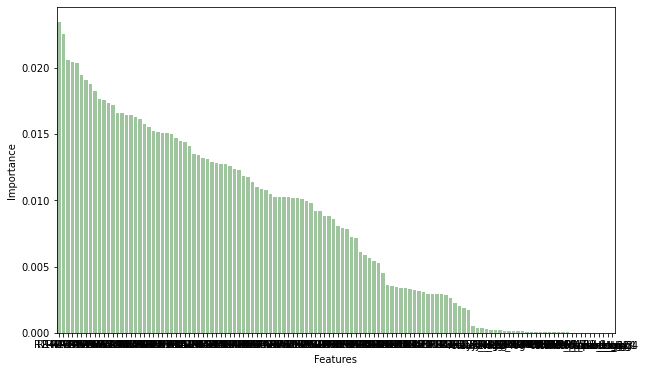

In [35]:
plt.figure(figsize=(10,6))
sns.barplot(y='Importance',x='Features',data = Feature_importance, color = 'g',alpha = 0.4)
plt.show()

In [36]:
# # Before dropping unimportant features
# lgr = LogisticRegression()
# lgr.fit(X_train,y_train)
# print('train score: {:.2f}'.format(lgr.score(X_train,y_train)))
# print('test score: {:.2f}'.format(lgr.score(X_test,y_test)))

In [37]:
#

# Selecting important features for training

In [38]:
X_train = X_train[first_45]
X_test = X_test[first_45]

In [39]:
# # After dropping unimportant features
# lgr = LogisticRegression()
# lgr.fit(X_train,y_train)
# print('train score: {:.2f}'.format(lgr.score(X_train,y_train)))
# print('test score: {:.2f}'.format(lgr.score(X_test,y_test)))

### Checking whether the target variable is balanced or not

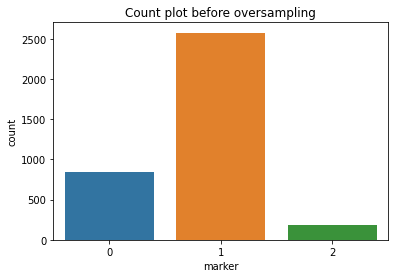

In [40]:
sns.countplot(y_train)
plt.title('Count plot before oversampling')
plt.show()

The graph above shows that the classes target variable is not balanced.

This presupposes that accuracy would not a good metric for measuring the performance of models built on this data.
Other metrics need to be employed in this case or the data should be balanced by employing a statiscal technique.

# 4.Building-of-Models

**In order to optimize the models, gridsearch with cross validation is applied to tune the hyperparameters of the different algorithms.**

## Decision tree as a base model

**Decision tree classifier before hyperparameter tuning**

In [41]:
#Instantiating the model
tree = DecisionTreeClassifier(random_state=42)

#Fitting the model
tree.fit(X_train,y_train)
tree_y_pred = tree.predict(X_test)

# Print train and test accuracies
print('train accuracy: {:.2f}'.format(tree.score(X_train,y_train)))
print('test accuracy: {:.2f}'.format(tree.score(X_test,y_test)))

train accuracy: 1.00
test accuracy: 0.94


**Hyperparameter tuning for decision tree**

In [42]:
# Hyperparameter tuning using gridsearch and cross validation.

#Instantiating the model
tree = DecisionTreeClassifier(random_state=42)
param_grid = {'max_features': [1,3,5,50,10,15,17,20,25,30,35,40,45],
              'max_leaf_nodes':[1,5,60,10,15,20,30,40,50,70,100,150,200]}
grid_tree = GridSearchCV(tree, param_grid = param_grid,cv =5)
grid_tree.fit(X_train,y_train)
print('Best cross-validation acuracy: {:.2f}'.format(grid_tree.best_score_))
print('Best test score: {:.2f}'.format(grid_tree.score(X_test,y_test)))
print('Best parameters:',grid_tree.best_params_)


Best cross-validation acuracy: 0.92
Best test score: 0.93
Best parameters: {'max_features': 35, 'max_leaf_nodes': 200}


**Decision tree classifier after hyperparameter tuning**

In [43]:
#Instantiating the model
tree = DecisionTreeClassifier(max_features=35,max_leaf_nodes=200,random_state=42)

#Fitting the model
tree.fit(X_train,y_train)
tree_y_pred = tree.predict(X_test)

# Print train and test accuracies
print('train accuracy: {:.2f}'.format(tree.score(X_train,y_train)))
print('test accuracy: {:.2f}'.format(tree.score(X_test,y_test)))


train accuracy: 1.00
test accuracy: 0.93


# Support Vector Machine

**Support vector classifier before hyperparameter tuning**

In [44]:
# SVC before Hyper-parameters tuning

Svc = Pipeline([('Scaler',StandardScaler()),('SVC',SVC(probability=True))])
#Svc = SVC(probability=True)
Svc_model = Svc.fit(X_train,y_train)
print('train score: {:.2f}'.format(Svc_model.score(X_train,y_train)))
print('test score: {:.2f}'.format(Svc_model.score(X_test,y_test)))

train score: 0.77
test score: 0.75


**Hyperparameter tuning for Support vector classifier**

In [45]:
#Hyper-parameter tuning with using pipline and gridsearch

pipe = Pipeline([('Scaler',StandardScaler()),('SVC',SVC(probability=True,decision_function_shape='ovo'))])
param_grid = {'SVC__C':[0.001,0.01,0.1,1,10,100],
            'SVC__gamma':[0.001,0.01,0.1,1,10,100]}
grid = GridSearchCV(pipe, param_grid = param_grid,cv =5)
grid.fit(X_train,y_train)
print('Best cross-validation acuracy: {:.2f}'.format(grid.best_score_))
#print('Best train score: {:.2f}'.format(grid.score(X_train,y_train)))
print('Best test score: {:.2f}'.format(grid.score(X_test,y_test)))
print('Best parameters:',grid.best_params_)

Best cross-validation acuracy: 0.95
Best test score: 0.96
Best parameters: {'SVC__C': 100, 'SVC__gamma': 1}


**Support vector classifier after hyperparameter tuning**

In [46]:
# SVC with tuned Hyper-parameters
Svc = Pipeline([('Scaler',StandardScaler()),('SVC',SVC(C=100,gamma=1,probability=True,decision_function_shape='ovo'))])
Svc_model = Svc.fit(X_train,y_train)
print('train score: {:.2f}'.format(Svc_model.score(X_train,y_train)))
print('test score: {:.2f}'.format(Svc_model.score(X_test,y_test)))
Svc_y_pred = Svc_model.predict(X_test)

train score: 1.00
test score: 0.96


# Random Forest

**Random Forest classifier before hyperparameter tuning**

In [47]:
rfc = RandomForestClassifier(random_state = 0)
rfc.fit(X_train,y_train)
print('train score: {:.2f}'.format(rfc.score(X_train,y_train)))
print('test score: {:.2f}'.format(rfc.score(X_test,y_test)))


train score: 1.00
test score: 0.96


**Hyperparameter tuning for Random Forestclassifier**

In [48]:
rfc = RandomForestClassifier(random_state = 0)
param_grid = {'max_features': [1,3,5,50,10,15,17,20,25,30,35,40,45],
              'max_leaf_nodes':[1,5,60,10,15,20,30,40,50,70,100,150,200],}
grid_rfc = GridSearchCV(rfc, param_grid = param_grid,cv =5)
grid_rfc.fit(X_train,y_train)
print('Best cross-validation acuracy: {:.2f}'.format(grid_rfc.best_score_))
print('Best test score: {:.2f}'.format(grid_rfc.score(X_test,y_test)))
print('Best parameters:',grid_rfc.best_params_)

Best cross-validation acuracy: 0.95
Best test score: 0.96
Best parameters: {'max_features': 5, 'max_leaf_nodes': 200}


**Random Forest  classifier after hyperparameter tuning**

In [49]:
rfc = RandomForestClassifier(max_features=17,max_leaf_nodes=200,random_state = 0)
rfc.fit(X_train,y_train)
print('train score: {:.2f}'.format(rfc.score(X_train,y_train)))
print('test score: {:.2f}'.format(rfc.score(X_test,y_test)))
rfc_y_pred = rfc.predict(X_test)

train score: 1.00
test score: 0.96


In [50]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 133 kB/s 


In [51]:
from catboost import CatBoostClassifier

In [52]:
# Before hyperparameter tuning
cbc = CatBoostClassifier(loss_function='MultiClass')

# Fit 'catboost' to the training set
cbc.fit(X_train,y_train)
cbc_y_pred = cbc.predict(X_test)
print('Train accuracy of CatBoostClassifier: {:.3f}'.format(cbc.score(X_train,y_train)))
print('Test accuracy of CatBoostClassifier: {:.3f}'.format(cbc.score(X_test,y_test)))


Learning rate set to 0.084483
0:	learn: 1.0305426	total: 88.6ms	remaining: 1m 28s
1:	learn: 0.9724349	total: 119ms	remaining: 59.3s
2:	learn: 0.9262794	total: 163ms	remaining: 54.3s
3:	learn: 0.8870944	total: 193ms	remaining: 48.1s
4:	learn: 0.8522474	total: 229ms	remaining: 45.5s
5:	learn: 0.8207927	total: 259ms	remaining: 42.8s
6:	learn: 0.7887282	total: 289ms	remaining: 41.1s
7:	learn: 0.7667158	total: 319ms	remaining: 39.6s
8:	learn: 0.7459197	total: 349ms	remaining: 38.4s
9:	learn: 0.7256876	total: 381ms	remaining: 37.7s
10:	learn: 0.7069445	total: 415ms	remaining: 37.3s
11:	learn: 0.6889922	total: 449ms	remaining: 36.9s
12:	learn: 0.6743715	total: 478ms	remaining: 36.3s
13:	learn: 0.6594718	total: 509ms	remaining: 35.9s
14:	learn: 0.6484196	total: 539ms	remaining: 35.4s
15:	learn: 0.6357347	total: 570ms	remaining: 35s
16:	learn: 0.6250784	total: 605ms	remaining: 35s
17:	learn: 0.6144039	total: 638ms	remaining: 34.8s
18:	learn: 0.6037664	total: 673ms	remaining: 34.8s
19:	learn: 0.

# 5.Model-Evaluation-and-Comparison

Different metrics are considered for evaluating and comparing the models.
Since the classes in the target variable (marker) is not balanced, 
accuracy is definetly not a good metric to rely on in this case hence will be used to only check for overfitting and underfitting.
Confusion matrix,F1 score,and Receiver Operation Curve will employed in evaluating and comparing the models.

## AUC,Precision,Recall and F1 scores 

In [54]:
tree_y_prod = tree.predict_proba(X_test)
svc_y_prod = Svc.predict_proba(X_test)
rfc_y_prod = rfc.predict_proba(X_test)
cbc_y_prod = cbc.predict_proba(X_test)


In [55]:
# 1.Decision tree
dct_auc_score = roc_auc_score(y_test,tree_y_prod,multi_class="ovr", average="weighted")
dct_precision_score = precision_score(y_test,tree_y_pred,average='weighted')
dct_recall_score = recall_score(y_test,tree_y_pred,average='weighted')
dct_f1_score = f1_score(y_test,tree_y_pred,average='weighted')

# 3.Support vector classifier
svc_auc_score = roc_auc_score(y_test,svc_y_prod,multi_class="ovr", average="weighted")
svc_precision_score = precision_score(y_test,Svc_y_pred,average='weighted')
svc_recall_score = recall_score(y_test,Svc_y_pred,average='weighted')
svc_f1_score=f1_score(y_test,Svc_y_pred,average='weighted')

# 4.Random Forest
rfc_auc_score = roc_auc_score(y_test,rfc_y_prod,multi_class="ovr", average="weighted")
rfc_precision_score = precision_score(y_test,rfc_y_pred,average='weighted')
rfc_recall_score = recall_score(y_test,rfc_y_pred,average='weighted')
rfc_f1_score=f1_score(y_test,rfc_y_pred,average='weighted')


# 4. Catboost classifier
cb_auc_score = roc_auc_score(y_test,cbc_y_prod,multi_class="ovr", average="weighted")
cb_precision_score = precision_score(y_test,cbc_y_pred,average='weighted')
cb_recall_score = recall_score(y_test,cbc_y_pred,average='weighted')
cb_f1_score=f1_score(y_test,cbc_y_pred,average='weighted')


## Creating a DataFrame with Models,Accuracy Scores and F1_scores

In [56]:
Model =['Decision tree','SVC','Random Forest', "Catboost Classifier"]

Auc_score = [dct_auc_score,svc_auc_score,rfc_auc_score,cb_auc_score]

Precison_score = [dct_precision_score,svc_precision_score,rfc_precision_score,cb_precision_score]

Recall_score = [dct_recall_score,svc_recall_score,rfc_recall_score,cb_recall_score]

F1_score = [dct_f1_score,svc_f1_score,rfc_f1_score,cb_f1_score]


In [57]:
len(Model)

4

In [58]:
#Creating the DataFrame

Accuracy_f1_score_report=pd.DataFrame({'Model':Model,
                                       "Auc_score":Auc_score,
                                       "Precison_score": Precison_score,
                                       "Recall_score":Recall_score,
                                        'F1_score':F1_score})
                                # index=np.arange(1,7,1))

#Sorting by fi_score
Accuracy_f1_score_report.sort_values(by='F1_score',
                                     ascending=False,
                                     inplace=True,
                                     ignore_index=True)


Accuracy_f1_score_report.set_index('Model')

,Auc_score,Precison_score,Recall_score,F1_score
Model,,,,
Random Forest,0.991785,0.961151,0.961265,0.960879
SVC,0.988312,0.955504,0.955455,0.954872
Catboost Classifier,0.983683,0.952637,0.952873,0.952541
Decision tree,0.926032,0.931537,0.931569,0.931477


In [59]:
Accuracy_f1_score_report

,Model,Auc_score,Precison_score,Recall_score,F1_score
0,Random Forest,0.991785,0.961151,0.961265,0.960879
1,SVC,0.988312,0.955504,0.955455,0.954872
2,Catboost Classifier,0.983683,0.952637,0.952873,0.952541
3,Decision tree,0.926032,0.931537,0.931569,0.931477


In [60]:
Accuracy_f1_score_report.to_csv('data3_multiclass_metrics.csv',index=False)